In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saken\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\saken\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\saken\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\saken\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saken\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [126]:
df= pd.read_csv('C:\\Users\\saken\\Downloads\\reviews.csv')

In [127]:
df.head()

,id,userName,content,score,appName
0,1,Ambarish Tomar,हर आदमी यहा हगता फिरता है।,2,Amazon
1,2,Lettia Monyamane,Mi luv it🤞🔥🔥🔥💚💛❤️,5,Amazon
2,3,felix randiz,Smooth experience,5,Amazon
3,4,coloser,therapeutic,5,Amazon
4,5,Joel Chiurawa,Dope,5,Amazon


In [128]:
print(df.shape)

(100, 5)


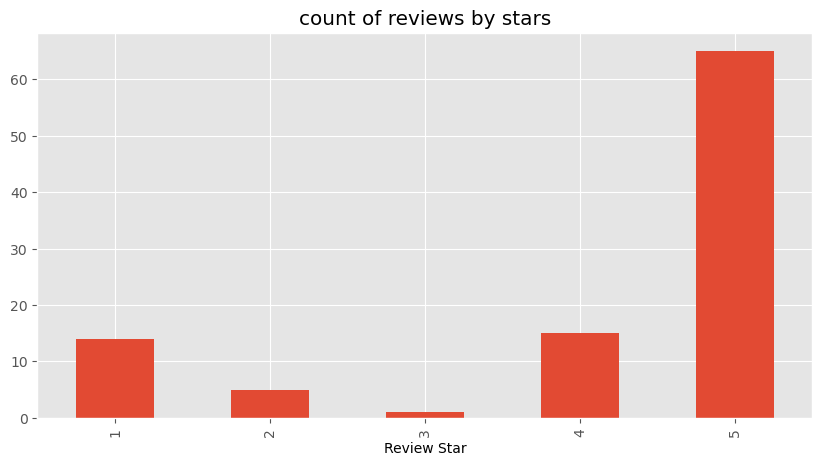

In [129]:
ax = df['score'].value_counts().sort_index().plot(kind='bar',title='count of reviews by stars',figsize = (10,5))
ax.set_xlabel('Review Star')
plt.show()

In [130]:
example = df['content'][50]
print(example)

This app is full of bugs


In [131]:
token=nltk.word_tokenize(example)
token

['This', 'app', 'is', 'full', 'of', 'bugs']

In [132]:
tagged=nltk.pos_tag(token)
tagged

[('This', 'DT'),
 ('app', 'NN'),
 ('is', 'VBZ'),
 ('full', 'JJ'),
 ('of', 'IN'),
 ('bugs', 'NNS')]

In [133]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S This/DT app/NN is/VBZ full/JJ of/IN bugs/NNS)


In [134]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

In [135]:
sia

In [136]:
sia.polarity_scores('I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [137]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [138]:
res = {}
for i,row in tqdm(df.iterrows(), total= len(df)):
    text = row['content']
    myid = row['id']
    res[myid] = sia.polarity_scores(text)
    

  0%|          | 0/100 [00:00<?, ?it/s]

In [139]:
vaders =pd.DataFrame(res).T
vaders =vaders.reset_index().rename(columns={'index':'id'})
vaders = vaders.merge(df,how='left')

In [140]:
vaders.head()

,id,neg,neu,pos,compound,userName,content,score,appName
0,1,0.0,1.0,0.0,0.0,Ambarish Tomar,हर आदमी यहा हगता फिरता है।,2,Amazon
1,2,0.0,1.0,0.0,0.0,Lettia Monyamane,Mi luv it🤞🔥🔥🔥💚💛❤️,5,Amazon
2,3,0.0,1.0,0.0,0.0,felix randiz,Smooth experience,5,Amazon
3,4,0.0,1.0,0.0,0.0,coloser,therapeutic,5,Amazon
4,5,0.0,1.0,0.0,0.0,Joel Chiurawa,Dope,5,Amazon


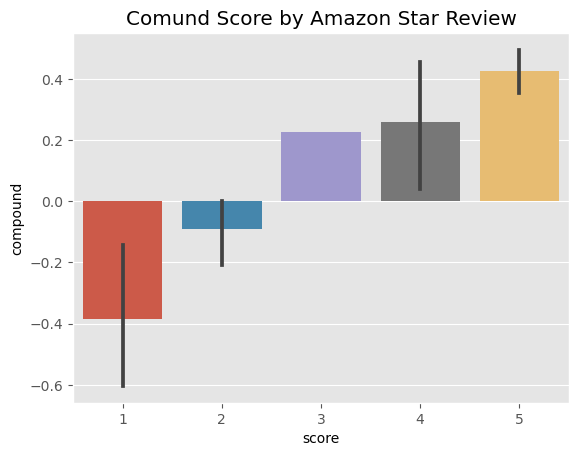

In [142]:
ax =sns.barplot(data = vaders, x= 'score', y ='compound')
ax.set_title('Comund Score by Amazon Star Review')
plt.show()

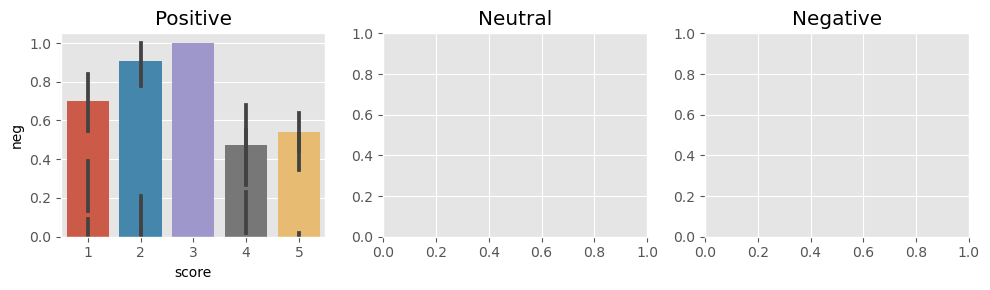

In [149]:
fig, axs = plt.subplots(1,3, figsize=(10,3))
sns.barplot(data = vaders, x ='score', y = 'pos', ax = axs[0])
sns.barplot(data = vaders, x ='score', y = 'neu', ax = axs[0])
sns.barplot(data = vaders, x ='score', y = 'neg', ax = axs[0])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()